# Hands-On Classification

## Task

Based on dataset provided, please choose one task as the list below:
1. Add another input features/attributes.
2. Change another machine learning algorithm such as SVM, decision tree, XGBoost, Bagging, KNN, Logistic regression and etc.


## Import libraries

In [1]:
import pandas as pd  # to store data as dataframe
import numpy as np  # for numerical calculations such as histogramming
import matplotlib.pyplot as plt  # for plotting

## Import Dataset

In [2]:
# In this notebook we only process the main signal ggH125_ZZ4lep and the main background llll,
# for illustration purposes.
# You can add other backgrounds after if you wish.
samples = ["llll", "ggH125_ZZ4lep"]

In [3]:
# get data from files

DataFrames = {}  # define empty dictionary to hold dataframes
for s in samples:  # loop over samples
    DataFrames[s] = pd.read_csv("4Zlepton/" + s + ".csv")  # read .csv file

In [4]:
# cut on lepton type
def cut_lep_type(lep_type_0, lep_type_1, lep_type_2, lep_type_3):
    # first lepton is [0], 2nd lepton is [1] etc
    # for an electron lep_type is 11
    # for a muon lep_type is 13
    # only want to keep events where one of eeee, mumumumu, eemumu
    sum_lep_type = lep_type_0 + lep_type_1 + lep_type_2 + lep_type_3
    if sum_lep_type == 44 or sum_lep_type == 48 or sum_lep_type == 52:
        return True
    else:
        return False

# cut on lepton charge
def cut_lep_charge(lep_charge_0,lep_charge_1,lep_charge_2,lep_charge_3):
# only want to keep events where sum of lepton charges is 0
    sum_lep_charge = lep_charge_0 + lep_charge_1 + lep_charge_2 + lep_charge_3
    if sum_lep_charge==0: return True
    else: return False

In [5]:
# apply cut on lepton type
for s in samples:
    # cut on lepton type using the function cut_lep_type defined above
    DataFrames[s] = DataFrames[s][
        np.vectorize(cut_lep_type)(
            DataFrames[s].lep_type_0,
            DataFrames[s].lep_type_1,
            DataFrames[s].lep_type_2,
            DataFrames[s].lep_type_3,
        )
    ]

In [6]:
# apply cut on lepton charge
for s in samples:
    # cut on lepton charge using the function cut_lep_charge defined above
    DataFrames[s] = DataFrames[s][ np.vectorize(cut_lep_charge)(DataFrames[s].lep_charge_0,
                                                    	    DataFrames[s].lep_charge_1,
                                                    	    DataFrames[s].lep_charge_2,
                                                    	    DataFrames[s].lep_charge_3) ]
DataFrames['ggH125_ZZ4lep'] # print signal data to take a look

,entry,lep_pt_0,lep_pt_1,lep_pt_2,lep_pt_3,lep_eta_0,lep_eta_1,lep_eta_2,lep_eta_3,lep_phi_0,...,lep_ptconerel_3,lep_etconerel_0,lep_etconerel_1,lep_etconerel_2,lep_etconerel_3,min_mll,mZ1,mZ2,mllll,totalWeight
0,0,51.905457,41.248570,16.397670,7.471228,-0.925709,-0.823695,-0.486417,0.266718,-2.774290,...,0.000000,-0.005114,0.034386,0.071266,-0.115843,9.953831,92.628607,23.311568,122.689157,0.000018
1,1,41.430645,40.307168,16.133789,7.481857,-1.233182,-0.396434,-0.541508,-0.302179,0.449031,...,0.151779,-0.030370,0.017931,0.030408,-0.120944,17.821408,86.697751,17.821408,113.659172,0.000034
2,2,33.646711,27.313271,20.035949,16.472641,-0.032324,-0.044153,0.067013,1.859531,-2.077223,...,0.000000,0.016144,-0.012675,0.101923,0.017772,32.122807,62.627431,32.122807,125.399958,0.000040
3,3,77.118562,27.845740,17.726541,14.714521,0.514764,0.845311,2.189158,0.179711,0.115437,...,0.000000,-0.005004,-0.007781,0.000000,0.034991,29.143731,84.535069,29.143731,123.645105,0.000059
4,4,161.909219,53.367754,25.596689,18.864479,-1.037354,-0.821728,-1.261883,0.126195,-0.161717,...,0.000000,0.018625,-0.000264,-0.001246,-0.002172,39.159591,68.958081,48.500839,123.518264,0.000078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164711,164711,32.143482,24.158068,17.203547,14.358152,-1.003832,0.609448,0.876340,1.039745,-0.417631,...,0.000000,-0.020921,0.040304,-0.001333,0.010283,25.926057,62.697352,39.612517,123.352912,0.000019
164712,164712,39.488273,33.694094,32.709998,14.797520,0.184790,0.799441,-0.454989,-1.167309,-0.747386,...,0.000000,0.040552,-0.000592,0.018882,-0.019414,30.654450,56.876117,30.654450,122.652688,0.000054
164713,164713,63.284211,22.707840,15.635994,14.873250,0.935591,0.184483,0.174508,2.128866,-1.503719,...,0.000000,0.010497,-0.015776,-0.022911,-0.003570,30.952590,66.649322,37.686620,124.312299,0.000071
164714,164714,52.538805,40.321457,25.766850,19.381920,0.880250,1.205615,1.701138,0.853039,-2.060255,...,0.000000,0.017046,-0.013661,0.057185,0.000224,19.868087,88.412652,19.868087,124.105421,0.000060


In [7]:
def plot_SoverB(DataFrames, SoverB_hist_dict):
    for x_variable,hist in SoverB_hist_dict.items(): # access the dictionary of histograms defined in the cell above

        h_bin_width = hist['bin_width'] # get the bin width defined in the cell above
        h_num_bins = hist['num_bins'] # get the number of bins defined in the cell above
        h_xrange_min = hist['xrange_min'] # get the x-range minimum defined in the cell above
        h_xlabel = hist['xlabel'] # get the x-axis label defined in the cell above
    
        bin_edges = [ h_xrange_min + x*h_bin_width for x in range(h_num_bins+1) ] # bin limits
        bin_centres = [ h_xrange_min+h_bin_width/2 + x*h_bin_width for x in range(h_num_bins) ] # bin centres
        
        signal_x = [] # define list to hold the signal histogram entries
        background_x = [] # define list to hold the background histogram entries
        for key in DataFrames: # loop over samples
            if key!='data': # only Monte Carlo should pass this
                if 'H125' in key or 'ttZ' in key: # only signal should pass this
                    signal_x = [*signal_x, *DataFrames[key][x_variable] ] # signal histogram entries
                else: # only background should pass this
                    background_x = [*background_x, *DataFrames[key][x_variable] ] # background histogram entries

    
    
        # *************
        # Signal and background distributions
        # *************
        distributions_axes = plt.gca() # get current axes
 
        background_heights = distributions_axes.hist(background_x, bins=bin_edges, 
                                                     color='blue', label='Total background',
                                                     histtype='step', # lineplot that's unfilled
                                                     density=True ) # normalize to form probability density
        signal_heights = distributions_axes.hist(signal_x, bins=bin_edges, color='orange',
                                                 label='Signal', 
                                                 histtype='step', # lineplot that's unfilled
                                                 density=True, # normalize to form probability density
                                                 linestyle='--' ) # dashed line
        
        distributions_axes.set_xlim( left=bin_edges[0], right=bin_edges[-1] ) # x-limits of the distributions axes
        distributions_axes.set_ylabel('Arbitrary units' ) # y-axis label for distributions axes
        distributions_axes.set_ylim( top=max(signal_heights[0])*1.3 ) # set y-axis limits
        plt.title('Signal and background '+x_variable+' distributions') # add title
        distributions_axes.legend() # draw the legend
        distributions_axes.set_xlabel( h_xlabel ) # x-axis label
        
        # Add text 'ATLAS Open Data' on plot
        plt.text(0.05, # x
                 0.93, # y
                 'ATLAS Open Data', # text
                 transform=distributions_axes.transAxes, # coordinate system used is that of distributions_axes
                 fontsize=13 ) 
        # Add text 'for education' on plot
        plt.text(0.05, # x
                 0.88, # y
                 'for education', # text
                 transform=distributions_axes.transAxes, # coordinate system used is that of distributions_axes
                 style='italic',
                 fontsize=8 )  
    
        plt.show() # show the Signal and background distributions
    
    
        # *************
        # Signal to background ratio
        # *************
        plt.figure() # start new figure
        SoverB = [] # list to hold S/B values
        for cut_value in bin_edges: # loop over bins
            signal_weights_passing_cut = 0 # start counter for signal weight passing cut
            background_weights_passing_cut = 0 # start counter for background weights passing cut
            for key in DataFrames: # loop over samples
                if key!='data': # only Monte Carlo should pass this
                    if 'H125' in key or 'ttZ' in key: # only signal should pass this
                        signal_weights_passing_cut += sum(DataFrames[key][DataFrames[key][x_variable]>cut_value].totalWeight)
                    else: # only background should pass this
                        background_weights_passing_cut += sum(DataFrames[key][DataFrames[key][x_variable]>cut_value].totalWeight)
            if background_weights_passing_cut!=0: # some background passes cut
                SoverB_value = signal_weights_passing_cut/background_weights_passing_cut
                SoverB_percent = 100*SoverB_value # multiply by 100 for percentage
                SoverB.append(SoverB_percent) # append to list of S/B values
        
        SoverB_axes = plt.gca() # get current axes
        SoverB_axes.plot( bin_edges[:len(SoverB)], SoverB ) # plot the data points
        SoverB_axes.set_xlim( left=bin_edges[0], right=bin_edges[-1] ) # set the x-limit of the main axes
        SoverB_axes.set_ylabel( 'S/B (%)' ) # write y-axis label for main axes
        plt.title('Signal to background ratio for different '+x_variable+' cut values', family='sans-serif')
        SoverB_axes.set_xlabel( h_xlabel ) # x-axis label 
        
        plt.show() # show S/B plot
    
    return


def compare_train_test(clf, X_train, y_train, X_test, y_test, xlabel):
    decisions = [] # list to hold decisions of classifier
    for X,y in ((X_train, y_train), (X_test, y_test)): # train and test
        if hasattr(clf, "predict_proba"): # if predict_proba function exists
            d1 = clf.predict_proba(X[y<0.5])[:, 1] # background
            d2 = clf.predict_proba(X[y>0.5])[:, 1] # signal
        else: # predict_proba function doesn't exist
            X_tensor = torch.as_tensor(X, dtype=torch.float) # make tensor from X_test_scaled
            y_tensor = torch.as_tensor(y, dtype=torch.long) # make tensor from y_test
            X_var, y_var = Variable(X_tensor), Variable(y_tensor) # make variables from tensors
            d1 = clf(X_var[y_var<0.5])[1][:, 1].cpu().detach().numpy() # background
            d2 = clf(X_var[y_var>0.5])[1][:, 1].cpu().detach().numpy() # signal
        decisions += [d1, d2] # add to list of classifier decision
    
    highest_decision = max(np.max(d) for d in decisions) # get maximum score
    bin_edges = [] # list to hold bin edges
    bin_edge = -0.1 # start counter for bin_edges
    while bin_edge < highest_decision: # up to highest score
        bin_edge += 0.1 # increment
        bin_edges.append(bin_edge)
    
    plt.hist(decisions[0], # background in train set
             bins=bin_edges, # lower and upper range of the bins
             density=True, # area under the histogram will sum to 1
             histtype='stepfilled', # lineplot that's filled
             color='blue', label='Background (train)', # Background (train)
            alpha=0.5 ) # half transparency
    plt.hist(decisions[1], # background in train set
             bins=bin_edges, # lower and upper range of the bins
             density=True, # area under the histogram will sum to 1
             histtype='stepfilled', # lineplot that's filled
             color='orange', label='Signal (train)', # Signal (train)
            alpha=0.5 ) # half transparency

    hist_background, bin_edges = np.histogram(decisions[2], # background test
                                              bins=bin_edges, # number of bins in function definition
                                              density=True ) # area under the histogram will sum to 1
    
    scale = len(decisions[2]) / sum(hist_background) # between raw and normalised
    err_background = np.sqrt(hist_background * scale) / scale # error on test background

    width = 0.1 # histogram bin width
    center = (bin_edges[:-1] + bin_edges[1:]) / 2 # bin centres
    
    plt.errorbar(x=center, y=hist_background, yerr=err_background, fmt='o', # circles
                 c='blue', label='Background (test)' ) # Background (test)
    
    hist_signal, bin_edges = np.histogram(decisions[3], # siganl test
                                          bins=bin_edges, # number of bins in function definition
                                          density=True ) # area under the histogram will sum to 1
    scale = len(decisions[3]) / sum(hist_signal) # between raw and normalised
    err_signal = np.sqrt(hist_signal * scale) / scale # error on test background
    
    plt.errorbar(x=center, y=hist_signal, yerr=err_signal, fmt='o', # circles
                 c='orange', label='Signal (test)' ) # Signal (test)
    
    plt.xlabel(xlabel) # write x-axis label
    plt.ylabel("Arbitrary units") # write y-axis label
    plt.legend() # add legend

## Machine Learning Input Features/Attributes

Please add another features such as:
ML_inputs = ["a","b","c","d"]

In [8]:
#Write your code here

In [9]:
#  Organise data ready for the machine learning model

# for sklearn data are usually organised
# into one 2D array of shape (n_samples x n_features)
# containing all the data and one array of categories
# of length n_samples

all_MC = []  # define empty list that will contain all features for the MC
for s in samples:  # loop over the different samples
    if s != "data":  # only MC should pass this
        all_MC.append(
            DataFrames[s][ML_inputs]
        )  # append the MC dataframe to the list containing all MC features
X = np.concatenate(
    all_MC
)  # concatenate the list of MC dataframes into a single 2D array of features, called X

all_y = (
    []
)  # define empty list that will contain labels whether an event in signal or background
for s in samples:  # loop over the different samples
    if s != "data":  # only MC should pass this
        if "H125" in s:  # only signal MC should pass this
            all_y.append(
                np.ones(DataFrames[s].shape[0])
            )  # signal events are labelled with 1
        else:  # only background MC should pass this
            all_y.append(
                np.zeros(DataFrames[s].shape[0])
            )  # background events are labelled 0
y = np.concatenate(
    all_y
)  # concatenate the list of labels into a single 1D array of labels, called y

This takes in DataFrames and spits out a NumPy array consisting of only the DataFrame columns corresponding to ML_inputs.

Now we separate our data into a training and test 

## Split dataset into training set and testing set

In [10]:
# This will split your data into train-test sets: 67%-33%.
# It will also shuffle entries so you will not get the first 67% of X for training
# and the last 33% for testing.
# This is particularly important in cases where you load all signal events first
# and then the background events.

# Here we split our data into two independent samples.
# The split is to create a training and testing set.
# The first will be used for classifier training and the second to evaluate its performance.

from sklearn.model_selection import train_test_split

# make train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)  # set the random seed for reproducibility

## Models

You can replace with another model:
1. [Support Vector Machine (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
2. [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
3. [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
4. [Bagging Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
5. [K Nearest Neighbors (KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
6. [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
7. [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
8. [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)



In [ ]:
#Write your code here

## Fit your model

In [ ]:
# Write your code here

## Predict the result using testing dataset

In [16]:
# Write your code here

0.7598160797577205


# Print accuracy score

In [ ]:
# Write your code here

## Confusion Matrix



<AxesSubplot:>

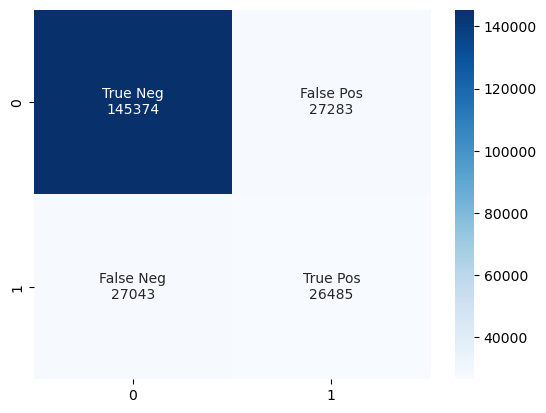

In [18]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)

import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
#group_percentages = [“{0:.2%}”.format(value) for value in
#                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,
          group_counts
          #group_percentages
          )
          ]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

## Classification Report

In [17]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred, target_names=["background", "signal"]))

              precision    recall  f1-score   support

  background       0.84      0.84      0.84    172657
      signal       0.49      0.49      0.49     53528

    accuracy                           0.76    226185
   macro avg       0.67      0.67      0.67    226185
weighted avg       0.76      0.76      0.76    226185



# ROC

In [19]:
decisions = model.predict_proba(X_test)[
    :, 1
]  # get the decisions of the decision tree

In [20]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(
    y_test, decisions
)

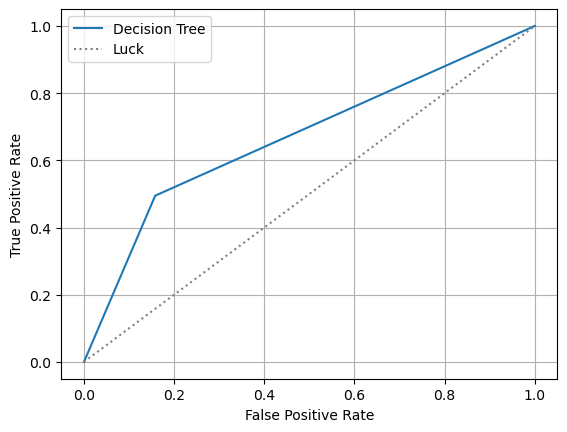

In [22]:
plt.plot(fpr, tpr, label="Decision Tree")  # plot random forest ROC
#plt.plot(
#    fpr_nn, tpr_nn, linestyle="dashed", label="Neural Network"
#)  # plot neural network ROC
plt.plot(
    [0, 1], [0, 1], linestyle="dotted", color="grey", label="Luck"
)  # plot diagonal line to indicate luck
plt.xlabel("False Positive Rate")  # x-axis label
plt.ylabel("True Positive Rate")  # y-axis label
plt.grid()  # add a grid to the plot
plt.legend()  # add a legend

## Features Importance


,Importance,Attributes
0,0.578712,lep_pt_1
1,0.421288,lep_pt_2


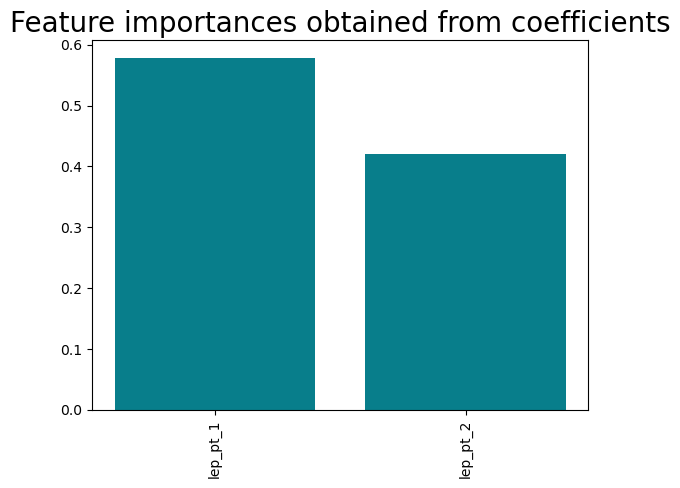

In [24]:
importance = model.feature_importances_

df1 = pd.DataFrame (importance, columns = ['Importance'])
df2 = pd.DataFrame (ML_inputs, columns = ['Attributes'])

result = pd.concat([df1, df2], axis=1, join='inner')
display(result)

result = result.sort_values(by='Importance', ascending=False)

plt.bar(x=result['Attributes'], height=result['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()